# 텍스트 데이터를 다루는 방법

# 1) One-hot Encoding

In [ ]:
import keras
keras.__version__

'2.4.3'

### 1-1) 단어 수준의 one-hot encoding

In [ ]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {} # 데이터에 있는 모든 토큰의 인덱스
for sample in samples:
    print('sample : ',sample)
    for word in sample.split():  # split() 메서드를 사용해 샘플을 토큰으로 나눔
        print('word : ',word)
        if word not in token_index:
            token_index[word] = len(token_index) + 1  # 단어의 고유 인덱스는 1부터 시작
            print('token_index '+'[' + word + ']', token_index[word])

# 샘플을 벡터로 변환
max_length = 10

results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))  # 영행렬 생성
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

print()
print (results)

sample :  The cat sat on the mat.
word :  The
token_index [The] 1
word :  cat
token_index [cat] 2
word :  sat
token_index [sat] 3
word :  on
token_index [on] 4
word :  the
token_index [the] 5
word :  mat.
token_index [mat.] 6
sample :  The dog ate my homework.
word :  The
word :  dog
token_index [dog] 7
word :  ate
token_index [ate] 8
word :  my
token_index [my] 9
word :  homework.
token_index [homework.] 10
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0

### 1-2) 문자 수준의 one-hot encoding

In [ ]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable  # 출력 가능한 모든 아스키(ASCII) 문자
print(characters)
token_index = dict(zip(characters, range(1, len(characters) + 1)))
print(token_index) # 위 문자들에 대한 dictionary

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        print(index)
        results[i, j, index] = 1.

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 10

### 1-3) keras를 활용한 단어 수준의 one-hot encoding

In [ ]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)  # 가장 빈도가 높은 1,000개의 단어만 선택
tokenizer.fit_on_texts(samples)  # 단어 인덱스 구축 (대소문자 구분 없음)

sequences = tokenizer.texts_to_sequences(samples)  # 문자열을 정수 인덱스의 리스트로 변환
print(sequences)

# 원-핫 인코딩 외에 다른 벡터화 방법
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index  # 계산된 단어 인덱스
print('Found %s unique tokens.' % len(word_index))

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
Found 9 unique tokens.


### 1-3) 해실 기법을 활용한 단어 수준의 one-hot encoding

In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000  # 크기가 1000인 벡터로 단어를 저장
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))  # 영행렬 생성
for i, sample in enumerate(samples):
    print('i = ',i)
    print('sample = ',sample)
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # 단어를 해싱하여 0과 1,000 사이의 랜덤한 정수 인덱스로 변환합니다.
        index = abs(hash(word)) % dimensionality # 해당 인덱스에 1을 집어넣고 one-hot code 적용.
        print(index)
        results[i, j, index] = 1.

i =  0
sample =  The cat sat on the mat.
527
511
85
390
745
499
i =  1
sample =  The dog ate my homework.
527
919
62
901
905


# 2) Token Embedding (저차원의 실수형 벡터)

## 2-1) Embedding 층을 사용해 단어 임베딩 학습

랜덤하게 선택한 단어 벡터를 시작으로 신경망 가중치를 학습한다. 임베딩 층을 neural network에 추가하는 방식이다.

In [ ]:
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)  # (가능한 토큰의 개수, 임베딩 차원)

In [12]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen=20  # 가장 빈번한 max_features 개의 단어만 사용

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)  # 정수 리스트로 데이터를 로드

print(x_train.shape)
print(x_train[0])
print()
print(x_test.shape)
print(x_test[0])

# 리스트를 (sample, maxlen) 크기의 2D 정수 텐서로 변환
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen) 
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

(25000,)
[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 

In [ ]:
# 뒤에서 20개의 단어 인덱스를 추출한 결과

print(x_train.shape)
print(x_train[0])
print()
print(x_test.shape)
print(x_test[0])

(25000, 20)
[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]

(25000, 20)
[ 286  170    8  157   46    5   27  239   16  179    2   38   32   25
 7944  451  202   14    6  717]


위를 임베딩 층에 추가해 학습한다.

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000,8, input_length=maxlen))  # Embedding 층의 출력 크기는 (samples, maxlen, 8)

model.add(Flatten())  # 3D(samples, maxlen, 8) -> 2D(samples, maxlen*8) 펼친다.

# 분류기 추가
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6847 - acc: 0.5713 - val_loss: 0.6135 - val_acc: 0.7016
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5613 - acc: 0.7503 - val_loss: 0.5212 - val_acc: 0.7330
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4642 - acc: 0.7914 - val_loss: 0.4981 - va

maxlen=20으로 설정해 20개의 단어만 가지고 학습한 것 치고는 75%라는 높은 성능을 보인다.  
그러나 단어 사이의 관계나 문장 구조를 고려하지 않았기 때문에, Embedding layer 위에 순환층이나 1D 합성곱층을 추가하는 것이 좋다.

## 2-2) 사전 훈련된 단어 Embedding

훈련 데이터가 부족할 때, 풀려는 문제가 아닌 다른 머신 러닝 작업에서 미리 계산된 단어 임베딩을 로드한다.

### 2-2-1) 데이터셋 준비

In [16]:
import zipfile
!unzip /content/sample_data/aclImdb.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: __MACOSX/aclImdb/train/pos/._7754_9.txt  
  inflating: aclImdb/train/pos/7755_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7755_9.txt  
  inflating: aclImdb/train/pos/7756_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7756_10.txt  
  inflating: aclImdb/train/pos/7757_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7757_9.txt  
  inflating: aclImdb/train/pos/7758_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7758_7.txt  
  inflating: aclImdb/train/pos/7759_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7759_10.txt  
  inflating: aclImdb/train/pos/775_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._775_7.txt  
  inflating: aclImdb/train/pos/7760_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7760_10.txt  
  inflating: aclImdb/train/pos/7761_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7761_10.txt  
  inflating: aclImdb/train/pos/7762_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7762_8.txt  
  inflating:

In [33]:
import os

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []  #neg->0, pos->1
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

### 2-2-2) 데이터 토큰화

In [34]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # 100개 단어 이후는 버림
training_samples = 200  # 단어 임베딩은 작은 크기의 훈련 데이터에서 유용하기 때문에 훈련셋 크기를 200개로 제한
validation_samples = 10000  
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용

# 텍스트를 벡터로 만듬
tokenizer = Tokenizer(num_words=max_words)  #IMDB 데이터로부터 token들을 추출
tokenizer.fit_on_texts(texts)  # index 추출
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

# 샘플이 순서대로 있기 때문에 먼저 suffle
indices = np.arange(data.shape[0])
print(indices)  # 데이터의 개수 :0부터 24999까지 총 250000개

np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# 데이터를 훈련 세트와 검증 세트로 분할
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)
[    0     1     2 ... 24997 24998 24999]


미리 계산된 단어 임베딩 데이터베이스 GloVe 다운로드

In [3]:
import zipfile
!unzip /content/sample_data/glove.6B.100d.zip

Archive:  /content/sample_data/glove.6B.100d.zip
  inflating: glove.6B.100d.txt       


임베팅 전처리 (단어와 그 벡터 표현을 매핑하는 인덱스 생성)

In [35]:
import numpy as np

embeddings_index = {}
f = open('/content/glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print(values)
print(word)
print(coefs)
print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

['sandberger', '0.28365', '-0.6263', '-0.44351', '0.2177', '-0.087421', '-0.17062', '0.29266', '-0.024899', '0.26414', '-0.17023', '0.25817', '0.097484', '-0.33103', '-0.43859', '0.0095799', '0.095624', '-0.17777', '0.38886', '0.27151', '0.14742', '-0.43973', '-0.26588', '-0.024271', '0.27186', '-0.36761', '-0.24827', '-0.20815', '0.22128', '-0.044409', '0.021373', '0.24594', '0.26143', '0.29303', '0.13281', '0.082232', '-0.12869', '0.1622', '-0.22567', '-0.060348', '0.28703', '0.11381', '0.34839', '0.3419', '0.36996', '-0.13592', '0.0062694', '0.080317', '0.0036251', '0.43093', '0.01882', '0.31008', '0.16722', '0.074112', '-0.37745', '0.47363', '0.41284', '0.24471', '0.075965', '-0.51725', '-0.49481', '0.526', '-0.074645', '0.41434', '-0.1956', '-0.16544', '-0.045649', '-0.40153', '-0.13136', '-0.4672', '0.18825', '0.2612', '0.16854', '0.22615', '0.62992', '-0.1288', '0.055841', '0.01928', '0.024572', '0.46875', '0.2582', '-0.31672', '0.048591', '0.3277', '-0.50141', '0.30855', '0.119

In [36]:
#  임베딩 층에 주입할 수 있는 임베딩 행렬 생성


embedding_dim = 100  # 40만개의 단어에 대해, 100차원의 임베딩 행렬을 가지고 있다.

embedding_matrix = np.zeros((max_words, embedding_dim))  # i번째 원소는 단어 인덱스의 i번째 단어에 상응하는 embedding_dim 차원의 벡터
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # 임베딩 인덱스에 없는 단어는 모두 0
            embedding_matrix[i] = embedding_vector

### 2-2-3) 모델 정의

In [37]:
# 임베딩 층을 사용했을 때와 동일한 구조의 모델 사용

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 모델에 GloVe 임베딩 로드
model.layers[0].set_weights([embedding_matrix])  # 모델의 첫번째 층인 Embedding 층에 준비된 GloVe 행렬을 로드
model.layers[0].trainable = False  # train되지 않도록 설정

### 2-2-4) 모델 훈련과 평가

In [39]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 2s 139ms/step - loss: 1.8611 - acc: 0.5304 - val_loss: 0.8621 - val_acc: 0.4938
Epoch 2/10
7/7 [==============================] - 1s 105ms/step - loss: 0.6248 - acc: 0.6081 - val_loss: 0.8236 - val_acc: 0.5064
Epoch 3/10
7/7 [==============================] - 1s 104ms/step - loss: 0.4763 - acc: 0.7424 - val_loss: 1.1808 - val_acc: 0.5064
Epoch 4/10
7/7 [==============================] - 1s 103ms/step - loss: 0.4674 - acc: 0.7415 - val_loss: 2.0656 - val_acc: 0.5064
Epoch 5/10
7/7 [==============================] - 1s 106ms/step - loss: 0.5707 - acc: 0.8123 - val_loss: 0.6929 - val_acc: 0.5641
Epoch 6/10
7/7 [==============================] - 1s 117ms/step - loss: 0.1556 - acc: 1.0000 - val_loss: 0.8006 - val_acc: 0.5347
Epoch 7/10
7/7 [==============================] - 1s 114ms/step - loss: 0.1929 - acc: 0.9718 - val_loss: 0.6966 - val_acc: 0.5749
Epoch 8/10
7/7 [==============================] - 1s 114ms/step - loss: 0.0818 - acc: 1.00

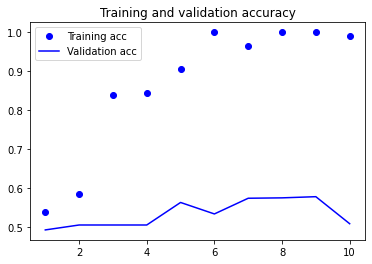

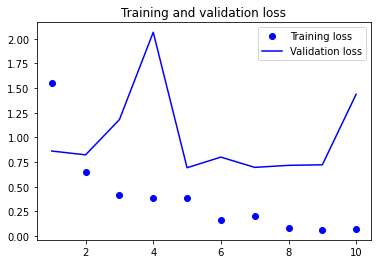

In [40]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

훈련샘플 수가 작기 때문에 빠르게 과대적합이 시작된다. 훈련set과 검증set 사이의 정확도 역시 차이가 크다.

## 2-3) 사전 훈련된 단어 Embedding을 사용하지 않거나 임베딩 층을 동결하지 않고 같은 모델을 훈련하는 방법

해당 작업에 특화된 입력 토큰의 임베딩을 학습

In [41]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 138ms/step - loss: 0.6950 - acc: 0.4945 - val_loss: 0.6909 - val_acc: 0.5260
Epoch 2/10
7/7 [==============================] - 1s 109ms/step - loss: 0.5133 - acc: 0.9835 - val_loss: 0.6924 

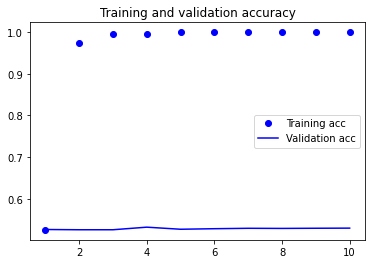

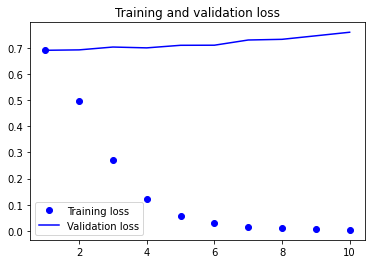

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

검증 정확도가 약 50%를 유지하고 있다.이 예제에서는 사전 훈련된 단어 임베딩을 사용하는 것이(2-2) 임베딩을 함께 훈련하는 것(2-1) 보다 낫다.  
훈련 샘플 수를 2000개로 늘려서 실습해보자.

In [43]:
training_samples = 2000
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [44]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
63/63 [==============================] - 1s 23ms/step - loss: 0.6362 - acc: 0.6075 - val_loss: 0.7172 - val_acc: 0.5824
Epoch 2/10
63/63 [==============================] - 1s 23ms/step - loss: 0.1667 - acc: 0.9810 - val_loss: 0.6190 - val_acc: 0.6731
Epoch 3/10
63/63 [==============================] - 2s 24ms/step - loss: 0.0206 - acc: 1.0000 - val_loss: 0.6409 - val_acc: 0.6919
Epoch 4/10
63/63 [==============================] - 1s 23ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.6994 - val_acc: 0.7018
Epoch 5/10
63/63 [==============================] - 1s 23ms/step - loss: 1.2385e-04 - acc: 1.0000 - val_loss: 0.7982 - val_acc: 0.7036
Epoch 6/10
63/63 [==============================] - 1s 23ms/step - loss: 6.7741e-06 - acc: 1.0000 - val_loss: 0.8695 - val_acc: 0.7088
Epoch 7/10
63/63 [==============================] - 2s 27ms/step - loss: 6.9608e-07 - acc: 1.0000 - val_loss: 0.9459 - val_acc: 0.7120
Epoch 8/10
63/63 [==============================] - 1s 23ms/step - loss

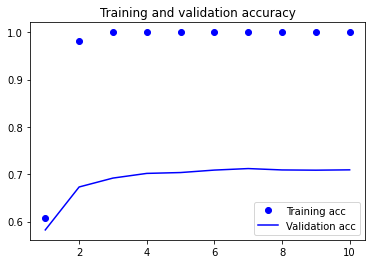

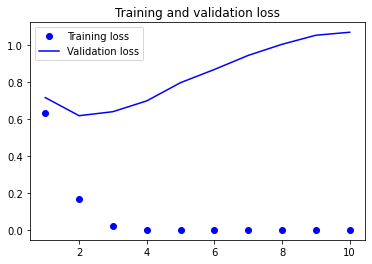

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

training sample 수가 늘어나니 val_acc이 70%정도인 것을 확인할 수 있다.

## 2-4) 테스트 데이터에서 모델을 평가

### 2-4-1 ) 테스트 데이터 토큰화

In [47]:

test_dir = '/content/aclImdb/test'

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

### 2-4-2) 테스트 데이터에서 모델 평가

In [48]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 1.4676 - acc: 0.5024


[1.4676096439361572, 0.5023999810218811]

테스트 정확도는 약 50%로, 비교적 낮다.